In [1]:
# Multi-class Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('E:\\Semester-6\\Machine Learning\\Iris.csv')

In [4]:
dataset['Species'].replace({'Iris-setosa':'1', 'Iris-versicolor':'2', 'Iris-virginica':'3'}, inplace=True)

In [5]:
X = dataset.iloc[:, [1, 2, 3, 4]].values
Y = dataset.iloc[:, [5]].values

In [6]:
for i in X:
    print(i, end=" ")

[5.1 3.5 1.4 0.2] [4.9 3.  1.4 0.2] [4.7 3.2 1.3 0.2] [4.6 3.1 1.5 0.2] [5.  3.6 1.4 0.2] [5.4 3.9 1.7 0.4] [4.6 3.4 1.4 0.3] [5.  3.4 1.5 0.2] [4.4 2.9 1.4 0.2] [4.9 3.1 1.5 0.1] [5.4 3.7 1.5 0.2] [4.8 3.4 1.6 0.2] [4.8 3.  1.4 0.1] [4.3 3.  1.1 0.1] [5.8 4.  1.2 0.2] [5.7 4.4 1.5 0.4] [5.4 3.9 1.3 0.4] [5.1 3.5 1.4 0.3] [5.7 3.8 1.7 0.3] [5.1 3.8 1.5 0.3] [5.4 3.4 1.7 0.2] [5.1 3.7 1.5 0.4] [4.6 3.6 1.  0.2] [5.1 3.3 1.7 0.5] [4.8 3.4 1.9 0.2] [5.  3.  1.6 0.2] [5.  3.4 1.6 0.4] [5.2 3.5 1.5 0.2] [5.2 3.4 1.4 0.2] [4.7 3.2 1.6 0.2] [4.8 3.1 1.6 0.2] [5.4 3.4 1.5 0.4] [5.2 4.1 1.5 0.1] [5.5 4.2 1.4 0.2] [4.9 3.1 1.5 0.1] [5.  3.2 1.2 0.2] [5.5 3.5 1.3 0.2] [4.9 3.1 1.5 0.1] [4.4 3.  1.3 0.2] [5.1 3.4 1.5 0.2] [5.  3.5 1.3 0.3] [4.5 2.3 1.3 0.3] [4.4 3.2 1.3 0.2] [5.  3.5 1.6 0.6] [5.1 3.8 1.9 0.4] [4.8 3.  1.4 0.3] [5.1 3.8 1.6 0.2] [4.6 3.2 1.4 0.2] [5.3 3.7 1.5 0.2] [5.  3.3 1.4 0.2] [7.  3.2 4.7 1.4] [6.4 3.2 4.5 1.5] [6.9 3.1 4.9 1.5] [5.5 2.3 4.  1.3] [6.5 2.8 4.6 1.5] [5.7 2.8 4

In [7]:
for i in Y:
    print(i, end=" ")

['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['1'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['2'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] ['3'] 

In [8]:
# Splitting Data into Training and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [9]:
for i in X_train:
    print(i, end=" ")

[6.4 3.1 5.5 1.8] [5.4 3.  4.5 1.5] [5.2 3.5 1.5 0.2] [6.1 3.  4.9 1.8] [6.4 2.8 5.6 2.2] [5.2 2.7 3.9 1.4] [5.7 3.8 1.7 0.3] [6.  2.7 5.1 1.6] [5.9 3.  4.2 1.5] [5.8 2.6 4.  1.2] [6.8 3.  5.5 2.1] [4.7 3.2 1.3 0.2] [6.9 3.1 5.1 2.3] [5.  3.5 1.6 0.6] [5.4 3.7 1.5 0.2] [5.  2.  3.5 1. ] [6.5 3.  5.5 1.8] [6.7 3.3 5.7 2.5] [6.  2.2 5.  1.5] [6.7 2.5 5.8 1.8] [5.6 2.5 3.9 1.1] [7.7 3.  6.1 2.3] [6.3 3.3 4.7 1.6] [5.5 2.4 3.8 1.1] [6.3 2.7 4.9 1.8] [6.3 2.8 5.1 1.5] [4.9 2.5 4.5 1.7] [6.3 2.5 5.  1.9] [7.  3.2 4.7 1.4] [6.5 3.  5.2 2. ] [6.  3.4 4.5 1.6] [4.8 3.1 1.6 0.2] [5.8 2.7 5.1 1.9] [5.6 2.7 4.2 1.3] [5.6 2.9 3.6 1.3] [5.5 2.5 4.  1.3] [6.1 3.  4.6 1.4] [7.2 3.2 6.  1.8] [5.3 3.7 1.5 0.2] [4.3 3.  1.1 0.1] [6.4 2.7 5.3 1.9] [5.7 3.  4.2 1.2] [5.4 3.4 1.7 0.2] [5.7 4.4 1.5 0.4] [6.9 3.1 4.9 1.5] [4.6 3.1 1.5 0.2] [5.9 3.  5.1 1.8] [5.1 2.5 3.  1.1] [4.6 3.4 1.4 0.3] [6.2 2.2 4.5 1.5] [7.2 3.6 6.1 2.5] [5.7 2.9 4.2 1.3] [4.8 3.  1.4 0.1] [7.1 3.  5.9 2.1] [6.9 3.2 5.7 2.3] [6.5 3.  5

In [10]:
for i in X_test:
    print(i, end=" ")

[5.8 2.8 5.1 2.4] [6.  2.2 4.  1. ] [5.5 4.2 1.4 0.2] [7.3 2.9 6.3 1.8] [5.  3.4 1.5 0.2] [6.3 3.3 6.  2.5] [5.  3.5 1.3 0.3] [6.7 3.1 4.7 1.5] [6.8 2.8 4.8 1.4] [6.1 2.8 4.  1.3] [6.1 2.6 5.6 1.4] [6.4 3.2 4.5 1.5] [6.1 2.8 4.7 1.2] [6.5 2.8 4.6 1.5] [6.1 2.9 4.7 1.4] [4.9 3.1 1.5 0.1] [6.  2.9 4.5 1.5] [5.5 2.6 4.4 1.2] [4.8 3.  1.4 0.3] [5.4 3.9 1.3 0.4] [5.6 2.8 4.9 2. ] [5.6 3.  4.5 1.5] [4.8 3.4 1.9 0.2] [4.4 2.9 1.4 0.2] [6.2 2.8 4.8 1.8] [4.6 3.6 1.  0.2] [5.1 3.8 1.9 0.4] [6.2 2.9 4.3 1.3] [5.  2.3 3.3 1. ] [5.  3.4 1.6 0.4] 

In [11]:
for i in Y_train:
    print(i, end=" ")

['3'] ['2'] ['1'] ['3'] ['3'] ['2'] ['1'] ['2'] ['2'] ['2'] ['3'] ['1'] ['3'] ['1'] ['1'] ['2'] ['3'] ['3'] ['3'] ['3'] ['2'] ['3'] ['2'] ['2'] ['3'] ['3'] ['3'] ['3'] ['2'] ['3'] ['2'] ['1'] ['3'] ['2'] ['2'] ['2'] ['2'] ['3'] ['1'] ['1'] ['3'] ['2'] ['1'] ['1'] ['2'] ['1'] ['3'] ['2'] ['1'] ['2'] ['3'] ['2'] ['1'] ['3'] ['3'] ['3'] ['3'] ['1'] ['1'] ['3'] ['3'] ['1'] ['3'] ['1'] ['3'] ['3'] ['1'] ['1'] ['3'] ['1'] ['1'] ['1'] ['2'] ['3'] ['3'] ['1'] ['1'] ['1'] ['2'] ['2'] ['1'] ['1'] ['2'] ['1'] ['3'] ['2'] ['3'] ['2'] ['1'] ['3'] ['1'] ['3'] ['1'] ['1'] ['3'] ['1'] ['3'] ['2'] ['2'] ['2'] ['3'] ['3'] ['2'] ['2'] ['1'] ['2'] ['3'] ['3'] ['1'] ['2'] ['2'] ['2'] ['2'] ['1'] ['1'] ['1'] ['3'] ['2'] ['3'] ['1'] 

In [12]:
for i in Y_test:
    print(i, end=" ")

['3'] ['2'] ['1'] ['3'] ['1'] ['3'] ['1'] ['2'] ['2'] ['2'] ['3'] ['2'] ['2'] ['2'] ['2'] ['1'] ['2'] ['2'] ['1'] ['1'] ['3'] ['2'] ['1'] ['1'] ['3'] ['1'] ['1'] ['2'] ['2'] ['1'] 

In [13]:
# Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [14]:
# Predicting test set Results

classifier.predict(X_test)

array(['3', '2', '1', '3', '1', '3', '1', '2', '2', '2', '3', '2', '2',
       '2', '2', '1', '2', '2', '1', '1', '3', '2', '1', '1', '3', '1',
       '1', '2', '2', '1'], dtype=object)

In [15]:
classifier.score(X_test, Y_test)

1.0

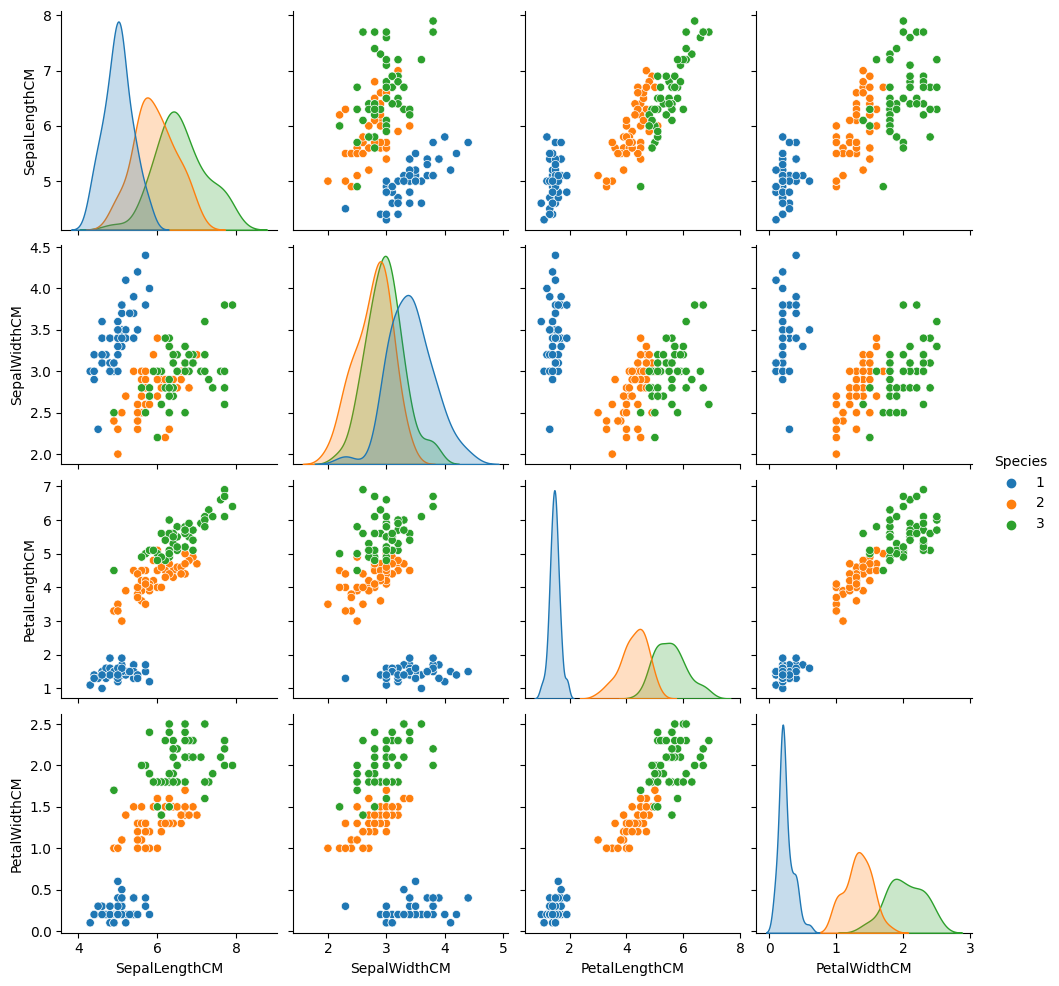

In [16]:
# Visualising Multiclass Data

import seaborn as sns 
sns.pairplot(dataset[['SepalLengthCM','SepalWidthCM','PetalLengthCM', 'PetalWidthCM','Species']], hue='Species')

In [20]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
res = np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1)

print(y_pred)

['3' '2' '1' '3' '1' '3' '1' '2' '2' '2' '3' '2' '2' '2' '2' '1' '2' '2'
 '1' '1' '3' '2' '1' '1' '3' '1' '1' '2' '2' '1']


In [27]:
from sklearn.metrics import mean_absolute_error

MAE =  mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error : " , MAE)

Mean Absolute Error :  0.0


In [28]:
from sklearn.metrics import mean_squared_error

MSE =  mean_squared_error(Y_test, y_pred)
print("Mean Squared Error : ", MSE)

Mean Squared Error :  0.0


In [29]:
import math

Y_test = [int(numeric_string) for numeric_string in Y_test]
y_pred = [int(numeric_string) for numeric_string in y_pred]
MSE = np.square(np.subtract(Y_test, y_pred)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error : ", RMSE)

Root Mean Square Error :  0.0


In [30]:
from sklearn.metrics import r2_score

r = r2_score(Y_test, y_pred)
print(r)

1.0
